In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
import feature_effect as fe
import ipywidgets as widgets
plt.rcParams["figure.figsize"] = (15,10)

In [14]:
def generate_samples(N):
    x = np.random.uniform(size=N-2)
    x = np.expand_dims(np.concatenate((np.array([0.001]), x, np.array([.999]))), axis=-1)
    return x


params = [{"b":0.3, "from": 0., "to": .1},
          {"b":7. , "from": 0.1, "to": .2},
          {"b":-1.5, "from": 0.2, "to": .3},
          {"b":0., "from": 0.3, "to": .4},
          {"b":-5., "from": 0.4, "to": .5},
          {"b":0.3, "from": 0.5, "to": .6},
          {"b":7. , "from": 0.6, "to": .7},
          {"b":-1.5, "from": 0.7, "to": .8},
          {"b":0., "from": 0.8, "to": .9},
          {"b":-5., "from": 0.9, "to": 1.}]


def f1(x):
    """Piece-wise linear"""

    def find_a(params, x_start):
        params[0]["a"] = x_start
        for i, param in enumerate(params):
            if i < len(params) - 1:
                a_next = param["a"] + (param["to"]-param["from"])*param["b"]
                params[i+1]["a"] = a_next

    limits = [param["from"] for param in params]
    limits.append(params[-1]["to"])


    x_start = -1
    find_a(params, x_start)

    ind = np.squeeze(np.digitize(x, limits))
    breakpoint()
    y = []
    for i, point in enumerate(x):
        res = params[ind[i] - 1]["a"] + \
            (point - params[ind[i] - 1]["from"])*params[ind[i] - 1]["b"]

        y.append(res)
    return np.array(y)

z = np.mean(f1(np.linspace(0.0001, 0.9999, 10000)))

def f1_center(x):
    return f1(x) - z

def compute_data_effect(x):
    """Piece-wise linear"""

    def find_a(params, x_start):
        params[0]["a"] = x_start
        for i, param in enumerate(params):
            if i < len(params) - 1:
                a_next = param["a"] + (param["to"]-param["from"])*param["b"]
                params[i+1]["a"] = a_next

    limits = [param["from"] for param in params]
    limits.append(params[-1]["to"])


    x_start = -1
    find_a(params, x_start)
    
    x = np.squeeze(x)
    ind = np.squeeze(np.digitize(x, limits))
    res1 = np.array(params)[ind-1]
    y = np.array([r['b'] for r in res1])

    # add noise
    noise_level = 10.
    np.random.seed(26443534)
    noise = np.random.normal(0, noise_level, y.shape[0])
    return np.expand_dims(y+noise, -1)


gt_bins = {}
gt_bins["height"] = [par["b"] for par in params]
gt_bins["limits"] = [par["from"] for par in params]
gt_bins["limits"].append(params[-1]["to"])

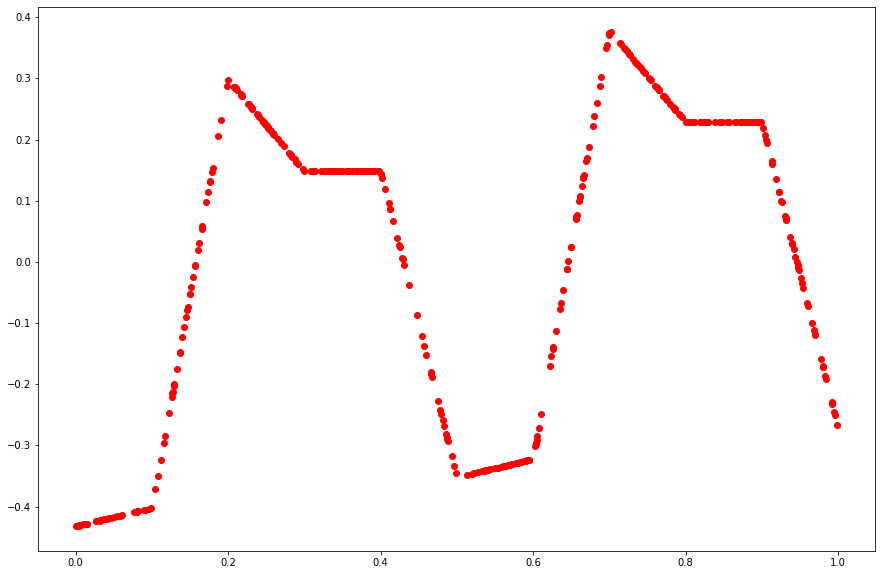

In [15]:
# parameters
N = 400
K = 10

# main part
seed = 4837571
np.random.seed(seed)


x = generate_samples(N=N)
y = f1_center(x)
data = x
data_effect = compute_data_effect(x)

plt.figure()
plt.plot(x, y, "ro")
# plt.plot(x, data_effect, "bo")
plt.show(block=False)

# generic estimator
# est = fe.Estimator(data=X, model=TestExample1.f, model_jac=TestExample1.f_der)
# est.fit(features=[0, 1], method="all", nof_bins=K)
# est.plot(feature=0, method="all")

In [17]:
dale = fe.DALE(data=x, model=f1, model_jac=compute_data_effect)
def plot(bins):
    dale.fit(features=[0], k=bins)
    dale.plot(s=0, block=False, gt=f1_center, gt_bins=gt_bins)
    plt.show()

dale_plot = widgets.interactive(plot, bins=(1, 500, 1))
dale_output = dale_plot.children[-1]
dale_output.layout.height = '700px'
dale_plot

interactive(children=(IntSlider(value=250, description='bins', max=500, min=1), Output(layout=Layout(height='7…

In [5]:
np.random.normal(0, 10, 10)

array([  0.9071736 ,  -6.72845486,  -9.20565055,  -0.32819595,
       -19.71960512,  16.92143755,  -0.53708002, -17.37261803,
       -11.58808387,  -4.83777994])

In [6]:
x = np.linspace(0.0001, 0.9999, 100000)
y = f1(x)

In [7]:
y.mean()

-0.567933130511789

In [8]:
gt_bins

{'height': [0.3, 7.0, -1.5, 0.0, -5.0, 0.3, 7.0, -1.5, 0.0, -5.0],
 'limits': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}